11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 64s 78ms/step - loss: 0.2145 - accuracy: 0.9334 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch 2/5
750/750 [==============================] - 50s 66ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0496 - val_accuracy: 0.9864
Epoch 3/5
750/750 [==============================] - 48s 65ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.0513 - val_accuracy: 0.9847
Epoch 4/5
750/750 [==============================] - 49s 65ms/step - loss: 0.0327 - accuracy: 0.9896 - val_loss: 0.0520 - val_accuracy: 0.9839
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0337 - accuracy: 0.9902
Test accuracy: 0.9901999831199646


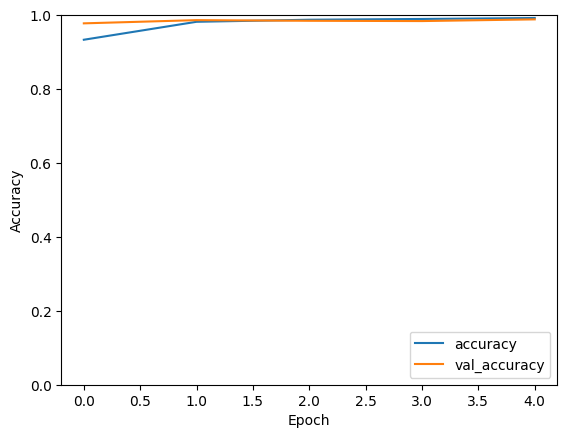

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
